# Kaggle Housing Price Competition
This code scored a high of a 0.12405 or top 1000 submissions (Top 20 Percent) on the Kaggle submission.

The format of the code is as follows:
1. Cleaning the Data
2. Analyzing Skew
3. Feature Engineering
4. Removing Outliers
5. Normalizing Data and Creating Dummies
6. Premodeling Analysis and Visualization
7. Modeling using entire dataset
8. Modeling using select variables from Premodeling Analysis

In [2556]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2557]:
test_filepath = "/Users/mikepriorusa/Desktop/ML Class/house-prices-advanced-regression-techniques/test.csv"
train_filepath = "/Users/mikepriorusa/Desktop/ML Class/house-prices-advanced-regression-techniques/train.csv"

In [2558]:
#read in and save data
test_df = pd.read_csv(test_filepath)
train_df = pd.read_csv(train_filepath)
#view the data and all the columns 
pd.set_option('display.max_columns', None) 
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [2559]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Let's clean up this data
I want to start by seeing the features missing data, how much data, and the kind of variable they are.

In [2560]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [2561]:
test_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,1458.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1457.000000,1457.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.00000,1381.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,52.619342,554.294925,1046.117970,1156.534613,325.967786,3.543523,1486.045922,0.434454,0.065202,1.570939,0.377656,2.854010,1.042495,6.385195,0.58122,1977.721217,1.766118,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,176.753926,437.260486,442.898624,398.165820,420.610226,44.043251,485.566099,0.530648,0.252468,0.555190,0.503017,0.829788,0.208472,1.508895,0.64742,26.431175,0.775945,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000,0.000000,407.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.00000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,0.000000,219.250000,784.000000,873.500000,0.000000,0.000000,1117.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.00000,1959.000000,1.000000,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,0.000000,460.000000,988.000000,1079.000000,0.000000,0.000000,1432.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,0.00000,1979.000000,2.000000,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,0.000000,797.750000,1305.000000,1382.500000,676.000000,0.000000,1721.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.00000,2002.000000,2.000000,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,1526.000000,2140.000000,5095.000000,5095.000000,1862.000000,1064.000000,5095.000000,3.000000,2.000000,4.000000,2.000000,6.000000,2.000000,15.000000,4.00000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [2562]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

### The cleaning of the data will come in 3 main steps: 
1) take care of any missing values if necessary
2) converting categorical variables to numeric with One-Hot encoding using get.dummies
3) converting ordinal variables to  variables from strings to numeric using .cat.code
4) normalize the data

For the variables that have missing values [sorted using value.counts()]...

Numerical Variables:
"LotFrontage", "MasVnrArea", "YrFinish", "YrBuilt"

Categorical Variables:
"GarageFinish", "GarageType", "BsmtFinType1", "BsmtFinType2", "BsmtExposure", "MasVnrType", "Electrical", "MSZoning", "Functional", "SaleType", "Exterior2nd", "Exterior1st"


Ordinal Variables:
"GarageCond", "GarageQual", "BsmtCond", "BsmtQual", "FireplaceQu"

Variables to drop that have too many missing variables:
"PoolQC","MiscFeature","Alley", "Fence"


In [2563]:
#instead of dropping these I tried just filling missing values with "None" but it gave me the same results so these
#must not have been significantly correlated with SalePrice
#dropping the variables with too many missing values
#train_df = train_df.drop(["PoolQC","MiscFeature","Alley", "Fence"],axis = 1)
#test_df = test_df.drop(["PoolQC","MiscFeature","Alley", "Fence"],axis = 1)

### 1.Missing Values with the categorical variables
Categorical Variables: "GarageFinish", "GarageType", "BsmtFinType1", "BsmtFinType2", "BsmtExposure", "MasVnrType", "Electrical", "MSZoning", "Functional", "SaleType", "Exterior2nd", "Exterior1st"

it appears and I'm going to guess that for Garage and Basement, both the type, finish, exposure, fintype1, fintype2 are missing about every time if there is no garage or basement looking at the data below (footage is 0 as show in min of data) in fact since there is no designation variable for that so I will fill those in with "none". 


In [2564]:
train_df.isnull().sum().sort_values(ascending=False).head(18)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
dtype: int64

In [2565]:
test_df.isnull().sum().sort_values(ascending=False).head(25)

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu      730
LotFrontage      227
GarageCond        78
GarageQual        78
GarageYrBlt       78
GarageFinish      78
GarageType        76
BsmtCond          45
BsmtQual          44
BsmtExposure      44
BsmtFinType1      42
BsmtFinType2      42
MasVnrType        16
MasVnrArea        15
MSZoning           4
BsmtHalfBath       2
Utilities          2
Functional         2
BsmtFullBath       2
BsmtFinSF2         1
BsmtFinSF1         1
dtype: int64

In [2566]:
train_df[["GarageFinish", "GarageType", "BsmtFinType1", "BsmtFinType2", "BsmtExposure"]] = train_df[["GarageFinish", "GarageType", "BsmtFinType1", "BsmtFinType2", "BsmtExposure"]].fillna("None")
test_df[["GarageFinish", "GarageType", "BsmtFinType1", "BsmtFinType2", "BsmtExposure"]] = test_df[["GarageFinish", "GarageType", "BsmtFinType1", "BsmtFinType2", "BsmtExposure"]].fillna("None")


The remaining categorical variables with missing values are "MasVnrType", "Electrical", "MSZoning", "Functional", "SaleType", "Exterior2nd", "Exterior1st"

In [2567]:
#let's see how many values are missing for each of these to make a gameplan to fix
train_df.isnull().sum().sort_values(ascending=False).head(8)

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
FireplaceQu     690
LotFrontage     259
GarageYrBlt      81
GarageQual       81
dtype: int64

In [2568]:
test_df.isnull().sum().sort_values(ascending=False).head(21)

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu      730
LotFrontage      227
GarageQual        78
GarageYrBlt       78
GarageCond        78
BsmtCond          45
BsmtQual          44
MasVnrType        16
MasVnrArea        15
MSZoning           4
BsmtHalfBath       2
Functional         2
BsmtFullBath       2
Utilities          2
GarageArea         1
GarageCars         1
BsmtUnfSF          1
dtype: int64

The categorical variables with missing variables that will be filled with the mode of our training set (to not bias our model or scale the two datasets differently) because missing <2 values are: "MSZoning", "Functional", "SaleType", "Exterior2nd", "Exterior1st", "Electrical", "Utilities"

In [2569]:
train_df.MSZoning.fillna(value=train_df.MSZoning.mode()[0], inplace=True)
test_df.MSZoning.fillna(value=train_df.MSZoning.mode()[0], inplace=True)

train_df.Functional.fillna(value=train_df.Functional.mode()[0], inplace=True)
test_df.Functional.fillna(value=train_df.Functional.mode()[0], inplace=True)

train_df.SaleType.fillna(value=train_df.SaleType.mode()[0], inplace=True)
test_df.SaleType.fillna(value=train_df.SaleType.mode()[0], inplace=True)

train_df.Exterior2nd.fillna(value=train_df.Exterior2nd.mode()[0], inplace=True)
test_df.Exterior2nd.fillna(value=train_df.Exterior2nd.mode()[0], inplace=True)

train_df.Exterior1st.fillna(value=train_df.Exterior1st.mode()[0], inplace=True)
test_df.Exterior1st.fillna(value=train_df.Exterior1st.mode()[0], inplace=True)

train_df.Electrical.fillna(value=train_df.Electrical.mode()[0], inplace=True)
test_df.Electrical.fillna(value=train_df.Electrical.mode()[0], inplace=True)

train_df.Utilities.fillna(value=train_df.Utilities.mode()[0], inplace=True)
test_df.Utilities.fillna(value=train_df.Utilities.mode()[0], inplace=True)

While "MasVnrType" is missing 16 values we will still just fill it with the mode for time sake

In [2570]:
train_df.MasVnrType.fillna(value=train_df.MasVnrType.mode()[0], inplace=True)
test_df.MasVnrType.fillna(value=test_df.MasVnrType.mode()[0], inplace=True)

### 1.Orginal Variables
Ordinal Variables: "GarageCond", "GarageQual", "BsmtCond", "BsmtQual", "FireplaceQu"

it appears and I'm going to guess that for Garage and Basement, both the quality and condition are missing about every time if there is no garage or basement (footage is 0 as show in min of data) in fact since there is no designation variable for that so I will fill those in with "none". 



In [2571]:
train_df[["GarageCond", "GarageQual", "BsmtCond", "BsmtQual"]] = train_df[["GarageCond", "GarageQual", "BsmtCond", "BsmtQual"]].fillna("None")
test_df[["GarageCond", "GarageQual", "BsmtCond", "BsmtQual"]] = test_df[["GarageCond", "GarageQual", "BsmtCond", "BsmtQual"]].fillna("None")


In [2572]:
#let's see, all that should be missing from the categorical or ordinal variables now is "FireplaceQu" 
#which also appears to have a lot of missing values
test_df.isnull().sum().sort_values(ascending=False).head(15)

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu      730
LotFrontage      227
GarageYrBlt       78
MasVnrArea        15
BsmtHalfBath       2
BsmtFullBath       2
KitchenQual        1
BsmtFinSF1         1
GarageArea         1
BsmtUnfSF          1
TotalBsmtSF        1
dtype: int64

In [2573]:
train_df.isnull().sum().sort_values(ascending=False).head(5)

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
FireplaceQu     690
dtype: int64

Why does FireplaceQu have so many missing values? Lets see how many observations have 0 for Fireplaces because it may be that if they don't have a fireplace, it counts quality as missing.

In [2574]:
train_df['Fireplaces'].value_counts()

0    690
1    650
2    115
3      5
Name: Fireplaces, dtype: int64

In [2575]:
test_df['Fireplaces'].value_counts()

0    730
1    618
2    104
3      6
4      1
Name: Fireplaces, dtype: int64

In [2576]:
test_df["PoolQC"].value_counts()

Ex    2
Gd    1
Name: PoolQC, dtype: int64

It appears all the missing FireplaceQu values just means the house doesn't have a fireplace so I will fill this along with some other features I identified with "none"

In [2577]:
#train_df[["FireplaceQu"]] = train_df[["FireplaceQu"]].fillna("None")
#test_df[["FireplaceQu"]] = test_df[["FireplaceQu"]].fillna("None")

select_features = ["PoolQC","MiscFeature","Alley", "Fence", "FireplaceQu"]
for feature in select_features:
    train_df[[feature]] = train_df[[feature]].fillna("None")
    test_df[[feature]] = test_df[[feature]].fillna("None")

Ordinal variables to fill with the mode because missing <2 values: "KitchenQual"

In [2578]:
train_df.KitchenQual.fillna(value=train_df.KitchenQual.mode()[0], inplace=True)
test_df.KitchenQual.fillna(value=train_df.KitchenQual.mode()[0], inplace=True)

### 1.Numerical Variables

Numerical Variables: "LotFrontage", "MasVnrArea", "GarageYrBuilt", "BsmtFullBath", "BsmtHalfBath", "Utilities", "TotalBsmtSF", "GarageArea", "BsmtFinSF2", "BsmtUnfSF", "GarageCars", "BsmtFinSF1" 

With these all having <2 values missing: "BsmtFullBath", "BsmtHalfBath", "Utilities", "TotalBsmtSF", "GarageArea", "BsmtFinSF2", "BsmtUnfSF", "GarageCars", "BsmtFinSF1"

those with less than 2 missing values will just be filled in with the median

In [2579]:
train_df.BsmtFullBath.fillna(value=train_df.BsmtFullBath.median(), inplace=True)
test_df.BsmtFullBath.fillna(value=train_df.BsmtFullBath.median(), inplace=True)

In [2580]:
train_df.BsmtHalfBath.fillna(value=train_df.BsmtHalfBath.median(), inplace=True)
test_df.BsmtHalfBath.fillna(value=train_df.BsmtHalfBath.median(), inplace=True)

In [2581]:
train_df.TotalBsmtSF.fillna(value=train_df.TotalBsmtSF.median(), inplace=True)
test_df.TotalBsmtSF.fillna(value=train_df.TotalBsmtSF.median(), inplace=True)

In [2582]:
train_df.GarageArea.fillna(value=train_df.GarageArea.median(), inplace=True)
test_df.GarageArea.fillna(value=train_df.GarageArea.median(), inplace=True)

In [2583]:
train_df.BsmtFinSF2.fillna(value=train_df.BsmtFinSF2.median(), inplace=True)
test_df.BsmtFinSF2.fillna(value=train_df.BsmtFinSF2.median(), inplace=True)

In [2584]:
train_df.BsmtUnfSF.fillna(value=train_df.BsmtUnfSF.median(), inplace=True)
test_df.BsmtUnfSF.fillna(value=train_df.BsmtUnfSF.median(), inplace=True)

In [2585]:
train_df.GarageCars.fillna(value=train_df.GarageCars.median(), inplace=True)
test_df.GarageCars.fillna(value=train_df.GarageCars.median(), inplace=True)

In [2586]:
train_df.BsmtFinSF1.fillna(value=train_df.BsmtFinSF1.median(), inplace=True)
test_df.BsmtFinSF1.fillna(value=train_df.BsmtFinSF1.median(), inplace=True)

In [2587]:
#possibly put more effort in to find a better way to fill in ~80 missing values from GarageYrBlt and ~15 from MasVnrArea
train_df.GarageYrBlt.fillna(value=train_df.GarageYrBlt.median(), inplace=True)
test_df.GarageYrBlt.fillna(value=train_df.GarageYrBlt.median(), inplace=True)

train_df.MasVnrArea.fillna(value=train_df.MasVnrArea.median(), inplace=True)
test_df.MasVnrArea.fillna(value=train_df.MasVnrArea.median(), inplace=True)

In [2588]:
#Let's look at what is left
train_df.isnull().sum().sort_values(ascending=False).head(4)

LotFrontage    259
SalePrice        0
Foundation       0
RoofMatl         0
dtype: int64

In [2589]:
test_df.isnull().sum().sort_values(ascending=False).head(4)

LotFrontage      227
SaleCondition      0
Foundation         0
RoofMatl           0
dtype: int64

The only missing value left is LotFrontage, there are quite a few missing values so I don't want to just fill with the mean and reduce variance in the data too much. I think this will be an important variable as theory states lot size to be strongly correlated with house price

In [2590]:
train_df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,None,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,None,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,None,None,None,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,None,None,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,None,None,None,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTi

In [2591]:
corr = train_df.corr()
corr.sort_values(["LotFrontage"], ascending = False, inplace = True)
print(corr.LotFrontage)

LotFrontage      1.000000
1stFlrSF         0.457181
LotArea          0.426095
GrLivArea        0.402797
TotalBsmtSF      0.392075
TotRmsAbvGrd     0.352096
SalePrice        0.351799
GarageArea       0.344997
GarageCars       0.285691
Fireplaces       0.266639
BedroomAbvGr     0.263170
OverallQual      0.251646
BsmtFinSF1       0.233633
PoolArea         0.206167
FullBath         0.198769
MasVnrArea       0.192411
OpenPorchSF      0.151972
BsmtUnfSF        0.132644
YearBuilt        0.123349
BsmtFullBath     0.100949
YearRemodAdd     0.088866
WoodDeckSF       0.088521
2ndFlrSF         0.080177
3SsnPorch        0.070029
GarageYrBlt      0.066552
HalfBath         0.053532
BsmtFinSF2       0.049900
ScreenPorch      0.041383
LowQualFinSF     0.038469
MoSold           0.011200
EnclosedPorch    0.010700
YrSold           0.007450
MiscVal          0.003368
KitchenAbvGr    -0.006069
BsmtHalfBath    -0.007234
Id              -0.010601
OverallCond     -0.059213
MSSubClass      -0.386347
Name: LotFro

From this, we can see that 1stFlrSF is the mostly highly correlated variable to LotFrontage. I want to break down LotFrontage into bins grouped by 1stFlrSF and then fill in the median of LotFrontage for each bin for each missing value in the corresponding bin. I can do this using groupby and transform to apply the fillna function to each missing value of each bin. 

In [2592]:
train_df["BinnedArea"] = pd.qcut(train_df['1stFlrSF'], 10)
test_df["BinnedArea"] = pd.qcut(test_df['1stFlrSF'], 10)

In [2593]:
train_df['LotFrontage'] = train_df.groupby(train_df['BinnedArea']).LotFrontage.transform(lambda x: x.fillna(x.mean()))
test_df['LotFrontage'] = test_df.groupby(test_df['BinnedArea']).LotFrontage.transform(lambda x: x.fillna(x.mean()))


In [2594]:
train_df = train_df.drop("BinnedArea", axis =1)
test_df = test_df.drop("BinnedArea", axis =1)

This should now mark the fact that all missing values have been dealt with and now can move on to removing outliers. Checking to make sure all missing values have been handled though below

In [2595]:
test_df.isnull().sum().sort_values(ascending=False).head(2)

SaleCondition    0
SaleType         0
dtype: int64

In [2596]:
train_df.isnull().sum().sort_values(ascending=False).head(2)

SalePrice    0
Heating      0
dtype: int64

## Is there any skew in the data to be fixed? 
If certain variables are skewed, I could come in here and take the log of them to normalize the distribution a bit more. For now I will just create the analysis and can come back later to further improve my score. I decided to just keep them as is, especially SalePrice for ease of interpretation later on. 


 mu = 180921.20 and sigma = 79415.29



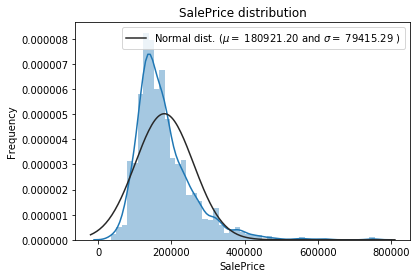

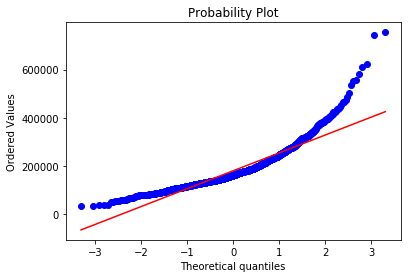

In [2597]:
from scipy import stats
from scipy.stats import norm, skew #for some statistics

sns.distplot(train_df['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train_df['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

fig = plt.figure()
res = stats.probplot(train_df['SalePrice'], plot=plt)
plt.show()

There is some skew to SalesPrice that can be fixed using logs so I will go ahead and fix that in the next section

In [2598]:
#skewness test to see if maybe some of the data needs to be resized using logs for example
#from scipy.stats import skew 
#skewness = train_df.apply(lambda x: skew(x))
#skewness.sort_values(ascending=False)

# Feature engineering? 
Something I can come back and consider doing is feature engineering or combining all the square footage measurements into one overarching feature. If my RMSE is way off I can come back and do this. I could also consider creating features like baths squared but I will do a take on that with a polynomial elastic net regression. 

In [2599]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.125889,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.589041,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,22.349100,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,23.997022,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1962.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,70.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [2600]:
train_df.shape

(1460, 81)

In [2601]:
test_df.shape

(1459, 80)

From theory, I know that total square footage of a house is highly correlated with the housing price along with baths squared because the marginal return to baths is decreasing so I will feature engineer these:

In [2602]:
# I want to engineer a feature that covers all square footage in the house
train_df["TotalSqFt"] = train_df.apply( lambda row: row["1stFlrSF"] + row["2ndFlrSF"] + row["TotalBsmtSF"] + row["GarageArea"] + row["GrLivArea"], axis=1)
test_df["TotalSqFt"] = test_df.apply( lambda row: row["1stFlrSF"] + row["2ndFlrSF"] + row["TotalBsmtSF"] + row["GarageArea"] + row["GrLivArea"], axis=1)



In [2603]:
# for baths squared
train_df["FullBathSq"] = train_df.apply( lambda row: row["FullBath"]**2, axis=1)
test_df["FullBathSq"] = test_df.apply( lambda row: row["FullBath"]**2, axis=1)



In [2604]:
#This actually made me results worse so I am going to remove it
# I want to make YearBuilt and GarageYrBlt more intuitive for the model by making it years since being built
#train_df["YearBuilt"] = train_df.apply( lambda row: (2019 - row["YearBuilt"]) , axis=1)
#test_df["YearBuilt"] = test_df.apply( lambda row: (2019 - row["YearBuilt"]) , axis=1)

#train_df["GarageYrBlt"] = train_df.apply( lambda row: (2019 - row["GarageYrBlt"]) , axis=1)
#test_df["GarageYrBlt"] = test_df.apply( lambda row: (2019 - row["GarageYrBlt"]) , axis=1)

In [2605]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalSqFt,FullBathSq
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500,4824,4
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500,4246,4
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500,5100,4
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,140000,4832,1
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,250000,6377,4


In [2606]:
#defining my y variable and taking log of SalePrice to remove skew
y = train_df.SalePrice
y = np.log(y+1)


# Removing outliers 
I will, similar to the next section, set this chart up to do some analysis on if there are any outliers. If my RMSE is off what I am going for, I can come back and remove all values outside the 3 * IQR range. Another option is to graph variables against SalePrice to visually look for outliers that I could drop. 

In [2607]:
#I can use this find the cutoffs for values outside the 25%-75% area of the values for each feature and then to 
#identify values that are outside the 3 *IQR range. I'm using 3x instead of 1.5x so as to not remove too much data. 
q_df = train_df.quantile([.25, .75])
q_df.loc['iqr'] = q_df.loc[0.75] - q_df.loc[0.25]
q_df.loc['whisker_length'] = 3 * q_df.loc['iqr']
q_df.loc['max_whisker'] = q_df.loc['whisker_length'] + q_df.loc[0.75]
q_df.loc['min_whisker'] = q_df.loc[0.25] - q_df.loc['whisker_length']
q_df

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,TotalSqFt,FullBathSq
0.25,365.75,20.0,60.0,7553.5,5.0,5.0,1954.0,1967.0,0.00,0.00,0.0,223.0,795.75,882.00,0.0,0.0,1129.50,0.0,0.0,1.0,0.0,2.0,1.0,5.0,0.0,1962.0,1.0,334.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,129975.0,3552.0,1.0
0.75,1095.25,70.0,80.0,11601.5,7.0,6.0,2000.0,2004.0,164.25,712.25,0.0,808.0,1298.25,1391.25,728.0,0.0,1776.75,1.0,0.0,2.0,1.0,3.0,1.0,7.0,1.0,2001.0,2.0,576.0,168.0,68.0,0.0,0.0,0.0,0.0,0.0,8.0,2009.0,214000.0,5324.5,4.0
iqr,729.50,50.0,20.0,4048.0,2.0,1.0,46.0,37.0,164.25,712.25,0.0,585.0,502.50,509.25,728.0,0.0,647.25,1.0,0.0,1.0,1.0,1.0,0.0,2.0,1.0,39.0,1.0,241.5,168.0,68.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,84025.0,1772.5,3.0
whisker_length,2188.50,150.0,60.0,12144.0,6.0,3.0,138.0,111.0,492.75,2136.75,0.0,1755.0,1507.50,1527.75,2184.0,0.0,1941.75,3.0,0.0,3.0,3.0,3.0,0.0,6.0,3.0,117.0,3.0,724.5,504.0,204.0,0.0,0.0,0.0,0.0,0.0,9.0,6.0,252075.0,5317.5,9.0
max_whisker,3283.75,220.0,140.0,23745.5,13.0,9.0,2138.0,2115.0,657.00,2849.00,0.0,2563.0,2805.75,2919.00,2912.0,0.0,3718.50,4.0,0.0,5.0,4.0,6.0,1.0,13.0,4.0,2118.0,5.0,1300.5,672.0,272.0,0.0,0.0,0.0,0.0,0.0,17.0,2015.0,466075.0,10642.0,13.0
min_whisker,-1822.75,-130.0,0.0,-4590.5,-1.0,2.0,1816.0,1856.0,-492.75,-2136.75,0.0,-1532.0,-711.75,-645.75,-2184.0,0.0,-812.25,-3.0,0.0,-2.0,-3.0,-1.0,1.0,-1.0,-3.0,1845.0,-2.0,-390.0,-504.0,-204.0,0.0,0.0,0.0,0.0,0.0,-4.0,2001.0,-122100.0,-1765.5,-8.0


In [2608]:
numerical_features = ["MSSubClass", "LotFrontage", "LotArea", "YearBuilt", "TotalBsmtSF", "1stFlrSF", "GrLivArea", "GarageYrBlt", "GarageArea", "YrSold", "TotalSqFt",  "SalePrice"]

In [2609]:
#before dropping outliers
train_df.shape

(1460, 83)

In [2610]:
#my for loop for dropping outside the specified range
for feature in numerical_features:
    train_df = train_df[(train_df[feature] > (q_df[feature].iloc[0] - 2.5 * q_df[feature].iloc[2])) & (train_df[feature] < (q_df[feature].iloc[1] + 2.5 * q_df[feature].iloc[2]))]

             

In [2611]:
#lets look at the new number of observations
train_df.shape
#so just less than 100 observations were dropped

(1378, 83)

In [2612]:
#defining my y variable and taking log of SalePrice to remove skew
y = train_df.SalePrice
y = np.log(y+1)

# Additional Feature Engigeering (Dummies) and Resizing
I will just focus on resizing my data for now and creating dummy variables

In [2613]:
#combining the test and train datasets for creating dummy variables
whole_dataset = pd.concat([train_df,test_df],axis=0, sort=False)
whole_dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalSqFt,FullBathSq
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500.0,4824.0,4
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500.0,4246.0,4
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500.0,5100.0,4
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,140000.0,4832.0,1
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,250000.0,6377.0,4


In [2614]:
#can I separate cateogorical from numerical using dtype? Yes it appears so from below
whole_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2837 entries, 0 to 1458
Data columns (total 83 columns):
Id               2837 non-null int64
MSSubClass       2837 non-null int64
MSZoning         2837 non-null object
LotFrontage      2837 non-null float64
LotArea          2837 non-null int64
Street           2837 non-null object
Alley            2837 non-null object
LotShape         2837 non-null object
LandContour      2837 non-null object
Utilities        2837 non-null object
LotConfig        2837 non-null object
LandSlope        2837 non-null object
Neighborhood     2837 non-null object
Condition1       2837 non-null object
Condition2       2837 non-null object
BldgType         2837 non-null object
HouseStyle       2837 non-null object
OverallQual      2837 non-null int64
OverallCond      2837 non-null int64
YearBuilt        2837 non-null int64
YearRemodAdd     2837 non-null int64
RoofStyle        2837 non-null object
RoofMatl         2837 non-null object
Exterior1st      2837 non

In [2615]:
#separating out the categorical and numerical features
categorical_features = whole_dataset.select_dtypes(include = ["object"]).columns
numerical_features = whole_dataset.select_dtypes(exclude = ["object"]).columns

whole_num = whole_dataset[numerical_features]
whole_cat = whole_dataset[categorical_features]


In [2616]:
#creating the dummies for the category dataframe and combining it with the numerical dataframe
whole_cat = pd.get_dummies(whole_cat)
whole_dataset = pd.concat([whole_cat,whole_num],axis=1)
whole_dataset.head()
#SalePrice is still in there so I'm going to drop it
whole_dataset = whole_dataset.drop(["SalePrice"], axis=1)
whole_dataset.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_None,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_Fin,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,PoolQC_None,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_Gar2,MiscFeature_None,

In [2617]:
#scale the dataset before breaking it up
from sklearn.preprocessing import MinMaxScaler, StandardScaler
min_max = MinMaxScaler()
index = whole_dataset["Id"]
whole_dataset = whole_dataset.drop(["Id"], axis=1)
#whole_dataset = min_max.fit_transform(whole_dataset)
#do a try with standard scaler
scaler = StandardScaler()
scaler.fit(whole_dataset)
whole_dataset2 = scaler.transform(whole_dataset)
whole_dataset2 = pd.DataFrame(whole_dataset2)


In [2618]:
#now to break them out into test and train datasets again
standard_train = whole_dataset2.iloc[:1378, ]
standard_test = whole_dataset2.iloc[1378:, ]
#to make sure it all looks good I'll just peek at the dataframes
standard_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301
1378,-0.092368,-0.226979,10.605659,-1.843488,-0.438197,-0.056413,0.056413,-0.209242,0.272423,-0.167029,-0.700015,-0.149474,-0.059475,0.740662,-0.198935,-0.200842,-0.126955,0.319649,0.018778,-0.018778,-0.460299,-0.246091,-0.173603,-0.070422,0.602189,0.208323,-0.201789,-0.049734,-0.09984,-0.059475,-0.103381,-0.197975,-0.105108,-0.321655,-0.190152,-0.267917,-0.240401,-0.183072,-0.114953,-0.198935,2.337181,-0.090407,-0.220025,-0.150701,-0.238756,-0.301221,-0.129792,-0.236272,-0.214689,-0.26182,-0.129792,-0.15313,-0.090407,-0.179964,4.103994,-2.490082,-0.079908,-0.114953,-0.09984,-0.131189,-0.046037,-0.056413,-0.042018,-0.067848,0.09984,-0.037576,-0.026561,-0.018778,-0.018778,-0.026561,0.456358,-0.144467,-0.198935,-0.187146,-0.294912,-0.347708,-0.082112,0.991226,-0.042018,-0.092368,-0.649109,-0.173603,-0.21737,-0.072907,0.501982,-0.088404,-0.473181,-0.062389,-0.037576,0.105108,-0.018778,-0.018778,-0.082112,-0.049734,-0.032536,-0.125514,-0.026561,-0.046037,-0.173603,-0.026561,-0.209242,-0.422665,-0.018778,-0.43017,-0.285633,-0.018778,-0.119587,1.353269,-0.402185,-0.140606,-0.116517,-0.037576,-0.088404,-0.126955,-0.032536,-0.210158,-0.402185,-0.070422,-0.428442,-0.018778,-0.316289,-0.042018,-0.124057,1.364831,-0.392671,-0.169245,-0.090407,-0.659547,0.805865,-0.299827,-0.179964,-0.108485,-0.710662,0.780506,-0.065175,-0.154331,-0.337431,-0.032536,0.387874,-0.346433,1.164608,-0.897695,-0.131189,-0.062389,-0.037576,-0.299827,-0.178918,-0.845103,-0.170344,1.124351,-0.193117,-0.206474,-0.171436,-0.042018,0.346433,-0.407493,-0.306756,-0.298428,0.715723,-0.171436,-0.418021,-0.319649,-0.633236,-0.236272,-0.16814,3.027946,-0.644724,-0.133942,-0.154331,-0.108485,5.690033,-0.16814,-0.192133,-2.422653,-0.018778,0.122584,-0.094289,-0.053178,-0.026561,-0.046037,-1.013843,-0.179964,-0.444468,-0.032536,1.543181,-0.270177,0.270177,-0.263354,-0.133942,-0.053178,-0.018778,0.306068,-0.26182,-0.155524,-0.808843,0.967056,-0.077643,-0.056413,-0.149474,-0.156709,-0.106809,-0.026561,0.267917,-0.114953,-0.162515,-0.574501,1.008140,-0.12838,-0.501432,-0.086356,0.835944,-0.111763,-0.254048,-0.072907,-0.610345,-0.23958,-0.562560,-0.24122,-0.621778,1.161254,-0.026561,-0.212886,-0.092368,-0.24122,-0.042018,0.35025,-0.032536,-0.163654,-0.072907,-0.24122,-0.070422,0.318979,-0.281278,-0.145734,0.322321,-0.026561,-0.026561,-0.032536,0.049734,-0.205544,-0.201789,2.770531,-0.065175,-2.005303,-0.042018,0.193117,-0.037576,-0.183072,-0.018778,-0.175746,-0.065175,-0.042018,-0.094289,-0.053178,-0.053178,-0.290655,-0.049734,0.387874,-0.264119,-0.065175,-0.090407,-0.126955,0.457485,-0.294205,-0.876679,0.583732,0.483977,-0.768009,0.389877,-0.338573,-1.106511,-0.570935,0.087071,0.566885,-0.660678,-0.372518,-0.667047,-0.785847,-0.095587,-1.233158,-0.813204,-0.248781,-1.024901,-0.750523,-1.050891,-0.208074,-0.925158,-0.911673,-0.688211,-0.993315,1.247008,0.386804,-0.699933,-0.362409,-0.103276,1.871297,-0

In [2619]:
standard_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301
0,-0.092368,-0.226979,-0.094289,0.54245,-0.438197,-0.056413,0.056413,-0.209242,0.272423,-0.167029,-0.700015,-0.149474,-0.059475,0.740662,-0.198935,-0.200842,-0.126955,0.319649,0.018778,-0.018778,-0.460299,-0.246091,-0.173603,-0.070422,0.602189,0.208323,-0.201789,-0.049734,-0.09984,-0.059475,-0.103381,-0.197975,-0.105108,3.108925,-0.190152,-0.267917,-0.240401,-0.183072,-0.114953,-0.198935,-0.427866,-0.090407,-0.220025,-0.150701,-0.238756,-0.301221,-0.129792,-0.236272,-0.214689,-0.26182,-0.129792,-0.15313,-0.090407,-0.179964,-0.243665,0.401593,-0.079908,-0.114953,-0.09984,-0.131189,-0.046037,-0.056413,-0.042018,-0.067848,0.09984,-0.037576,-0.026561,-0.018778,-0.018778,-0.026561,0.456358,-0.144467,-0.198935,-0.187146,-0.294912,-0.347708,-0.082112,-1.008851,-0.042018,-0.092368,1.540573,-0.173603,-0.21737,-0.072907,0.501982,-0.088404,-0.473181,-0.062389,-0.037576,0.105108,-0.018778,-0.018778,-0.082112,-0.049734,-0.032536,-0.125514,-0.026561,-0.046037,-0.173603,-0.026561,-0.209242,-0.422665,-0.018778,-0.430170,-0.285633,-0.018778,-0.119587,1.353269,-0.402185,-0.140606,-0.116517,-0.037576,-0.088404,-0.126955,-0.032536,-0.210158,-0.402185,-0.070422,-0.428442,-0.018778,-0.316289,-0.042018,-0.124057,1.364831,-0.392671,-0.169245,-0.090407,1.516192,-1.240902,-0.299827,-0.179964,-0.108485,1.407140,-1.281221,-0.065175,-0.154331,-0.337431,-0.032536,0.387874,-0.346433,-0.858658,1.113964,-0.131189,-0.062389,-0.037576,-0.299827,-0.178918,1.183287,-0.170344,-0.889402,-0.193117,-0.206474,-0.171436,-0.042018,0.346433,-0.407493,-0.306756,-0.298428,0.715723,-0.171436,-0.418021,-0.319649,1.579190,-0.236272,-0.16814,-0.330257,-0.644724,-0.133942,-0.154331,-0.108485,-0.175746,-0.16814,-0.192133,0.412771,-0.018778,0.122584,-0.094289,-0.053178,-0.026561,-0.046037,0.986346,-0.179964,-0.444468,-0.032536,-0.648012,-0.270177,0.270177,-0.263354,-0.133942,-0.053178,-0.018778,0.306068,-0.26182,-0.155524,1.236333,-1.034066,-0.077643,-0.056413,-0.149474,-0.156709,-0.106809,-0.026561,0.267917,-0.114953,-0.162515,-0.574501,1.008140,-0.12838,-0.501432,-0.086356,0.835944,-0.111763,-0.254048,-0.072907,-0.610345,-0.23958,-0.56256,-0.24122,1.608291,-0.861138,-0.026561,-0.212886,-0.092368,-0.24122,-0.042018,0.35025,-0.032536,-0.163654,-0.072907,-0.24122,-0.070422,0.318979,-0.281278,-0.145734,0.322321,-0.026561,-0.026561,-0.032536,0.049734,-0.205544,-0.201789,-0.360942,-0.065175,0.498678,-0.042018,0.193117,-0.037576,-0.183072,-0.018778,-0.175746,-0.065175,-0.042018,-0.094289,-0.053178,-0.053178,-0.290655,-0.049734,0.387874,-0.264119,-0.065175,-0.090407,-0.126955,0.457485,-0.294205,0.061864,-0.181266,-0.261379,0.678285,-0.510107,1.050435,0.904121,0.572292,0.634381,-0.291043,-0.935579,-0.434831,-0.773923,1.247592,-0.095587,0.486156,1.110949,-0.248781,0.813053,1.239416,0.180066,-0.208074,1.052742,-0.911673,1.001076,0.329085,0.382473,-0.740083,0.212955,-0.362409,-0.103276,-0.284567,-0.055251,-0.089

In [2620]:
#now to break them out into test and train datasets again (previous way of doing it)
#train = whole_dataset[whole_dataset.Id<1461]
#test = whole_dataset[whole_dataset.Id>1460]

In [2621]:
standard_test.shape

(1459, 302)

In [2622]:
standard_train.shape

(1378, 302)

both test and train sets have the same amount of columns which is something I was having trouble with for a while

In [2623]:
# OLD WAY (IGNORE) Decided to use the Standard Scaler to center the mean around 0 and a standard deviation of 1, will print out to make sure it worked
#scaler = StandardScaler()
#scaler.fit(train)
#standard_test = scaler.transform(train)
#print(np.mean(standard_train, 0))
#print(np.std(standard_train, 0))

#Standardizing the test dataset too
#scaler = StandardScaler()
#scaler.fit(test)
#standard_test = scaler.transform(test)

In [2624]:
#OLD IGNORE
#min_max = MinMaxScaler()
#standard_test = min_max.fit_transform(test)
#standard_train = min_max.fit_transform(train)

#standard_train = pd.DataFrame(standard_train)
#standard_test = pd.DataFrame(standard_test)
#standard_train.head()

I'm almost ready to start modeling, I just want to take a look at the relevant variables again

# Premodeling analysis and visualization

before I begin my models, I wanted to gauge manually which variables are highly correlated with Sale Price before I go in so I know kind of what to expect. 

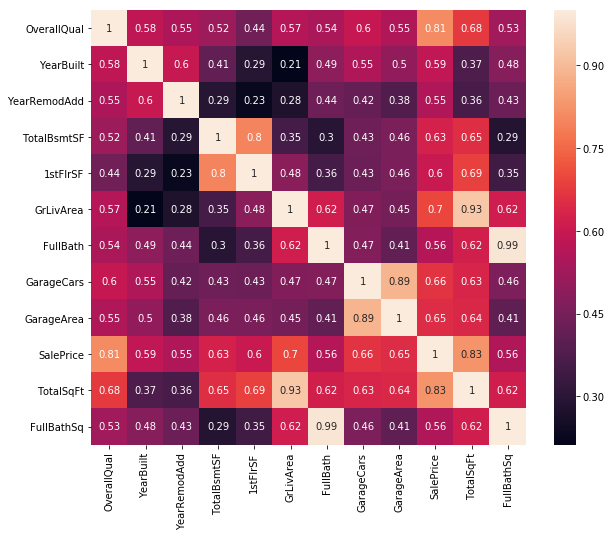

In [2625]:
correlation_sp = train_df.corr()
SalePriceCorr = correlation_sp.index[abs(correlation_sp['SalePrice'])>.55]
f, ax=plt.subplots(figsize=(10,8))
sns.heatmap(train_df[SalePriceCorr].corr(), square=True, annot=True)

In [2666]:
#Same thing as above but in a more readable format
corr = train_df.corr()
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
print(corr.SalePrice)

SalePrice        1.000000
TotalSqFt        0.825355
OverallQual      0.809380
GrLivArea        0.698203
GarageCars       0.662511
GarageArea       0.650565
TotalBsmtSF      0.626666
1stFlrSF         0.600557
YearBuilt        0.587085
FullBath         0.562785
FullBathSq       0.556912
YearRemodAdd     0.551717
GarageYrBlt      0.508783
TotRmsAbvGrd     0.495069
Fireplaces       0.457632
MasVnrArea       0.416694
LotArea          0.396553
LotFrontage      0.383598
BsmtFinSF1       0.354304
OpenPorchSF      0.333626
WoodDeckSF       0.320438
HalfBath         0.282451
2ndFlrSF         0.277542
BsmtUnfSF        0.232479
BsmtFullBath     0.214648
BedroomAbvGr     0.169748
ScreenPorch      0.102936
MoSold           0.075543
3SsnPorch        0.059135
PoolArea         0.037903
Id              -0.014305
MiscVal         -0.017494
YrSold          -0.024428
BsmtFinSF2      -0.025561
BsmtHalfBath    -0.030246
LowQualFinSF    -0.078946
MSSubClass      -0.082136
OverallCond     -0.090068
KitchenAbvGr

In [2627]:
#creating a list of the most highly correlated variables to try for linear regression
Select_Var = ["TotalSqFt", "OverallQual", "GrLivArea", "GarageCars", "GarageArea", "TotalBsmtSF", "YearBuilt", "FullBath", "FullBathSq", "1stFlrSF", "Id", "YearRemodAdd", "GarageYrBlt", "TotRmsAbvGrd", "Fireplaces", "MasVnrArea", "LotArea", "LotFrontage", "OpenPorchSF", "BsmtFinSF1", "WoodDeckSF", "2ndFlrSF", "HalfBath", "BsmtFullBath", "BsmtUnfSF", "BedroomAbvGr"]

It looks like the key features are going to be: OverallQual, GrLivArea, GarageCars, GarageArea, TotalBsmtSF, 1stFlrSF, FullBath, TotRmsAbvGrd. So it seems like overall squarefootage will be important along with the overall quality of the house, and baths. I could use these features as specifics for a linear regression if I wanted but I feel a linear regression won't be accurate by itself so I won't spend the time on this assignment. This can also be used to validate that our regularization regressions are emphasizing the most correlated features. 

# Modeling

In [2628]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, make_scorer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import make_pipeline
# Peforming Lasso and Ridge Regressions
from sklearn.model_selection import learning_curve
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LinearRegression
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, train_test_split, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV

#libraries for cleaning data, imputing values
from sklearn.preprocessing import Imputer
import sklearn as sk

#silencing warnings and other rubbish
import warnings
warnings.filterwarnings("ignore")

In [2629]:
y.shape

(1378,)

In [2630]:
standard_train.shape

(1378, 302)

In [2631]:
#in preparation for some of my modeling I want to break up my standardized test data to be able to evaluate the performance of my tests
X_train,X_test,y_train,y_test = train_test_split(standard_train,y,test_size = 0.3,random_state= 42)
x = standard_train

In [2632]:
#Here is a linear regression model
linear_regression_model = SGDRegressor(tol=.0001, eta0=.01)
linear_regression_model.fit(standard_train, y)
predictions = linear_regression_model.predict(standard_train)
mse = mean_squared_error(y, predictions)
print("RMSE: {}".format(np.sqrt(mse)))

RMSE: 27594.568485255928


In [2633]:
submit = pd.DataFrame({'SalePrice':predictions})
submit["SalePrice"] = np.exp(submit["SalePrice"])-1
submit = pd.concat([test_df.Id,submit],axis=1)
type(submit.Id)
submit.to_csv("submission.csv",index=False)

This linear regression seems to have worked okay but lets try some other linear regressions with a random search for the best hyperparameters

In [2634]:
#I'm going to do a random search first to find the best eta
from sklearn.model_selection import RandomizedSearchCV

param_dist = {"eta0": [ .001, .003, .01, .03, .1, .3, 1, 3], 'tol' : [.1, .01, .001, 0.0001]}

linear_regression_model = SGDRegressor()

n_iter_search = 19
random_search = RandomizedSearchCV(linear_regression_model, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=5, scoring='neg_mean_squared_error')
random_search.fit(X_train, y_train)

print("Best Parameters: {}".format(random_search.best_params_))
print("Best Negative MSE: {}".format(random_search.best_score_))

Best Parameters: {'tol': 0.0001, 'eta0': 0.001}
Best Negative MSE: -6.432040547354045


now that I know my best eta and tol, Im going to use that below

In [2635]:
#lets try a linear regression with cross validation
linear_regression_model = SGDRegressor(tol=.01, eta0=.03)
linear_regression_model.fit(X_train, y_train)
train_predictions = linear_regression_model.predict(X_train)
test_predictions = linear_regression_model.predict(X_test)

train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

print("Train RMSE: {}".format(np.sqrt(train_mse)))
print("Test RMSE: {}".format(np.sqrt(test_mse)))

Train RMSE: 803761606932.0402
Test RMSE: 353774431644.76263


In [2636]:
pipe = make_pipeline(linear_regression_model)
pipe.fit(x,y)
predictions = pipe.predict(standard_test)
submit = pd.DataFrame({'SalePrice':predictions})
submit["SalePrice"] = np.exp(submit["SalePrice"])-1
submit = pd.concat([test_df.Id,submit],axis=1)
type(submit.Id)
submit.to_csv("submission25.csv",index=False)

This scored a 0.136 which is imroved from 0.13702 without the feature engineering. Let's see if we can get this down though using some other techniques. Since the train has a lower RMSE than the test RMSE there is evidence of overfitting here. Since this has not worked very well so lets try some regularization models including first elastic net, and then lasso and ridge regressions. In these cases the use of alphas can help to prevent overfitting or high variance in our models. 

In [2637]:
sorted(list(zip(whole_dataset.columns, linear_regression_model.coef_)), key=lambda x: abs(x[1]))

[('GarageType_2Types', -32681300.001308743),
 ('SaleType_New', 166932076.81532842),
 ('OverallCond', 172621631.69619974),
 ('RoofStyle_Gable', -214601517.71603152),
 ('GarageCond_Fa', -233429388.0452409),
 ('ExterQual_Ex', -248845211.55952024),
 ('GarageArea', -252657670.47838253),
 ('GarageQual_TA', 267168904.10559538),
 ('RoofStyle_Hip', 289789622.3691954),
 ('FireplaceQu_Gd', 300118377.0450604),
 ('YrSold', -347244926.0764797),
 ('Exterior1st_VinylSd', -355062120.1399564),
 ('BsmtFinType1_ALQ', 355766129.28918713),
 ('Functional_Maj2', -429076651.57478064),
 ('BsmtFinType2_LwQ', -489957418.76438016),
 ('LotShape_IR3', -491171281.45768076),
 ('BsmtFinSF1', 492434033.1950058),
 ('Exterior1st_MetalSd', 499886974.9691255),
 ('FullBath', 505891886.25416213),
 ('PoolQC_Ex', -512646516.4247635),
 ('Condition2_PosN', -512646516.42476404),
 ('PavedDrive_N', 528653926.687299),
 ('Neighborhood_IDOTRR', -541865373.9003204),
 ('BsmtCond_Fa', 557106933.4669057),
 ('Heating_Wall', 591100214.130557

Looking at the coefficients on the features from the model helps us see that we are overfitting as every feature is used. The interpretation starts to become very hard now because of how we transformed both the features and target variables. An example interpretation is a 1 unit increase in HalfBath results in a 18524717691 percent increase in SalePrice since SalePrice is in logs. This number is so large because a real extra half bath is measured as only a fraction of 1 increase as measured in the dataframe under the feature HalfBath because of the normalizing of the dataset. 

I will check this on the next models to see how the coefficients change with regularization. 

In [2638]:
from sklearn.linear_model import ElasticNetCV

# l1 ratio of zero is l2 and visa-versa 
# alphas are how much to weight regularization
clf = ElasticNetCV(l1_ratio=[.1, 0.35, .5, .7, .9, .95, .99, 1], alphas=[0.01, .1, 1, 5, 9, 10], max_iter=1500, tol=0.0001)
clf.fit(X_train, y_train)
train_predictions = clf.predict(X_train)
test_predictions = clf.predict(X_test)
print("Train RMSE: {}".format(np.sqrt(mean_squared_error(y_train, train_predictions))))
print("Test RMSE: {}".format(np.sqrt(mean_squared_error(y_test, test_predictions))))

Train RMSE: 0.0905234763129137
Test RMSE: 0.12055438549321625


In [2639]:
pipe = make_pipeline(clf)
pipe.fit(x,y)
predictions = pipe.predict(standard_test)

In [2640]:
submit = pd.DataFrame({'SalePrice':predictions})
submit["SalePrice"] = np.exp(submit["SalePrice"])-1
submit = pd.concat([test_df.Id,submit],axis=1)
type(submit.Id)
submit.to_csv("submission3.csv",index=False)

This gave me a score of 0.12489 which is pretty good. This is still giving us evidence of high variance from overfitting on the train dataset. We know overall we have high bias as we can be more precise based on everyone else's answers. I will keep trying with the other regressions that will reduce overfitting and bias

In [2641]:
sorted(list(zip(whole_dataset.columns, clf.coef_)), key=lambda x: abs(x[1]))

[('MSZoning_RH', -0.0),
 ('MSZoning_RL', 0.0),
 ('Street_Grvl', -0.0),
 ('Street_Pave', 0.0),
 ('Alley_Grvl', -0.0),
 ('Alley_None', -0.0),
 ('LotShape_IR1', 0.0),
 ('LotShape_Reg', -0.0),
 ('LandContour_Bnk', -0.0),
 ('LandContour_HLS', 0.0),
 ('LandContour_Low', -0.0),
 ('LandContour_Lvl', -0.0),
 ('LotConfig_Corner', 0.0),
 ('LotConfig_FR2', -0.0),
 ('LotConfig_FR3', -0.0),
 ('LotConfig_Inside', -0.0),
 ('LandSlope_Gtl', -0.0),
 ('LandSlope_Sev', -0.0),
 ('Neighborhood_Blmngtn', -0.0),
 ('Neighborhood_Blueste', -0.0),
 ('Neighborhood_CollgCr', 0.0),
 ('Neighborhood_Gilbert', -0.0),
 ('Neighborhood_IDOTRR', -0.0),
 ('Neighborhood_NAmes', -0.0),
 ('Neighborhood_NPkVill', 0.0),
 ('Neighborhood_SWISU', 0.0),
 ('Neighborhood_Sawyer', -0.0),
 ('Neighborhood_SawyerW', -0.0),
 ('Neighborhood_Timber', 0.0),
 ('Condition1_Feedr', -0.0),
 ('Condition1_PosA', -0.0),
 ('Condition1_PosN', 0.0),
 ('Condition1_RRAn', 0.0),
 ('Condition1_RRNe', -0.0),
 ('Condition1_RRNn', 0.0),
 ('Condition2_Artery'

It is interesting that this even looks like a harmony of lasso and ridge by comparing this to their coefficients below. This is because elastic net is a harmony between these two models (l1 and l2), hopefully not reducing variance too much as to increase the bias. The variables that are not 0 are the features shown to be the most important, this includes a mixture of numerical and previously categorical features that are now dummy variables such as the year of the house, TotalSqFt, and so on. It makes sense that TotalSqFt has the largest coefficient as it was the most highly correlated feature. 

#### Regularization with Lasso and Ridge

In [2642]:

#create a scoring method for bayesian ridge and lasso
def return_rmse(model, x, y):
    scores = np.sqrt(-cross_val_score(model, x, y, cv = 7, scoring = 'neg_mean_squared_error'))
    return scores.mean()

#Function from sklearn for plotting learning curves and model results
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring = 'neg_mean_squared_error')
    
    train_scores_mean = np.mean(np.sqrt(-train_scores), axis=1)
    train_scores_std = np.std(np.sqrt(-train_scores), axis=1)
    test_scores_mean = np.mean(np.sqrt(-test_scores), axis=1)
    test_scores_std = np.std(np.sqrt(-test_scores), axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [2643]:
x = standard_train

In preparation for lasso and ridge regressions I'm going to do a random search for the best parameters starting with bayesian ridge

In [2644]:
#Bayesian Ridge Random Search, I will use the found parameters in my regression coming up
param_dist = { 'tol' : [.1, .01, .001, 0.0001, 0.00001], 'n_iter' : [300, 500, 600, 700, 800], 'alpha_1' : [0.0001, 0.001, 0.1, 1, 5, 10], 'alpha_2' : [0.0001, 0.001, 0.1, 1, 5, 10]}

linear_regression_model = BayesianRidge()

n_iter_search = 8
random_search = RandomizedSearchCV(linear_regression_model, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=5, scoring='neg_mean_squared_error')
random_search.fit(X_train, y_train)

print("Best Parameters: {}".format(random_search.best_params_))
print("Best Negative MSE: {}".format(random_search.best_score_))

Best Parameters: {'tol': 0.01, 'n_iter': 600, 'alpha_2': 5, 'alpha_1': 0.1}
Best Negative MSE: -0.013063996280665893


In [2645]:
#Lasso Random Search, I will use the found parameters in my regression coming up
param_dist = { 'tol' : [.1, .01, .001, 0.0001], 'alpha' : [0.5, 1, 5, 9, 10, 15]}

linear_regression_model = Lasso()

n_iter_search = 8
random_search = RandomizedSearchCV(linear_regression_model, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=5, scoring='neg_mean_squared_error')
random_search.fit(X_train, y_train)

print("Best Parameters: {}".format(random_search.best_params_))
print("Best Negative MSE: {}".format(random_search.best_score_))

Best Parameters: {'tol': 0.01, 'alpha': 1}
Best Negative MSE: -0.1428492779542883


I chose the option of a really high alpha in the random search since I have so many variables in my dataset

Lasso : RMSE = 0.373678622588939


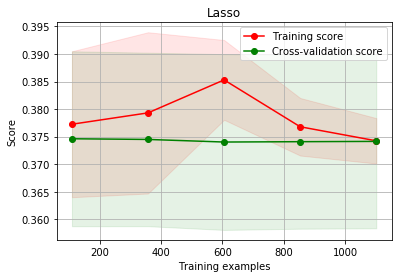

BayesianRidge : RMSE = 0.11354482148958987


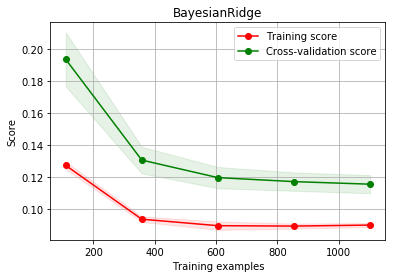

In [2664]:
lr = Lasso(alpha = 5, tol = 0.001, max_iter=1200)
br = BayesianRidge(n_iter=700, tol=0.00001, alpha_1=10, alpha_2=5)
modeltypes = [lr, br]
for model in modeltypes:
    scores = return_rmse(model, x, y)
    print(model.__class__.__name__,": RMSE =", scores)
    plot_learning_curve(model, model.__class__.__name__, x, y, cv = 5)
    plt.show()

There is not too high variance in these models so lets try the lasso in Kaggle to see our bias

In [2662]:
pipe = make_pipeline(lr)
pipe.fit(x,y)
predictions = pipe.predict(standard_test)

In [2663]:
sorted(list(zip(whole_dataset.columns, lr.coef_)), key=lambda x: abs(x[1]))

[('Utilities_NoSeWa', 2.136225619285396e-16),
 ('CentralAir_Y', 4.473063889594441e-16),
 ('Street_Pave', 6.065928035785547e-16),
 ('PoolQC_None', 1.635858157169394e-05),
 ('RoofMatl_Tar&Grv', -2.4280569987844993e-05),
 ('GarageQual_None', -3.392505549349926e-05),
 ('Electrical_SBrkr', 3.4629055155460856e-05),
 ('RoofStyle_Shed', 3.9785644758786196e-05),
 ('GarageCond_Ex', -5.154801716419166e-05),
 ('Exterior2nd_CBlock', 7.400290921137775e-05),
 ('LandContour_Bnk', -8.721897898041624e-05),
 ('GarageQual_TA', 8.873145686919565e-05),
 ('GarageFinish_None', 9.220956751565388e-05),
 ('GarageCond_None', -9.601033369073608e-05),
 ('LotShape_Reg', -9.93150591267258e-05),
 ('BsmtCond_TA', -0.00010869461100604154),
 ('LotConfig_Inside', -0.00012244391380040255),
 ('Exterior2nd_VinylSd', -0.00014175815313104004),
 ('ExterCond_TA', 0.0001465423893967896),
 ('KitchenQual_TA', 0.00015159144537349938),
 ('ExterQual_TA', 0.00016534606522835315),
 ('Condition2_RRNn', -0.0001726648771600519),
 ('Neighbo

By playing with the alpha in the lasso regression you can see how as it increases, certain variables go to zero and other variables become smaller. This shows how this regression reduces variance of the model but this can increase the bias. 

In [2647]:
pipe = make_pipeline(br)
pipe.fit(x,y)
predictions = pipe.predict(standard_test)


In [2648]:
#I want to look at the coefficients on this model versus the ElasticNet and normal Linear Regression
sorted(list(zip(whole_dataset.columns, br.coef_)), key=lambda x: abs(x[1]))

[('PoolQC_Ex', 3.3587208674783916e-17),
 ('Condition2_PosN', -2.0974101176208703e-16),
 ('Exterior1st_Stone', 2.9444849305868687e-05),
 ('Exterior2nd_MetalSd', 9.222426227900593e-05),
 ('LotShape_Reg', -9.257964707043431e-05),
 ('Condition1_RRAn', -0.00015149534417918664),
 ('Electrical_FuseF', -0.0001797416584960465),
 ('Condition2_Norm', -0.0001827942807852978),
 ('Fence_GdPrv', 0.0002038730159246438),
 ('Exterior2nd_Stone', 0.0002526668756468809),
 ('Exterior1st_CemntBd', -0.0002754624417817316),
 ('LandContour_Lvl', -0.0002904119578902853),
 ('RoofMatl_Tar&Grv', -0.00031911282950396517),
 ('Exterior1st_AsphShn', 0.0003191818340486652),
 ('Fence_MnPrv', 0.00034710637429278407),
 ('Neighborhood_SawyerW', 0.00034718884806043265),
 ('Functional_Min1', -0.0003506660987686698),
 ('Heating_OthW', 0.0003681902595414552),
 ('BsmtFinType2_LwQ', 0.00038918810096156414),
 ('HouseStyle_SFoyer', -0.00040408188927598676),
 ('RoofMatl_Roll', 0.0004089262604515427),
 ('Heating_Wall', 0.000414189153

Here you can see that the features near the bottom have been adjusted to have a larger effect with only one zero before the decimal point as opposed to the dummies which have 2 or 3 when comparing comparing to the linear regession up coefficients. The alpha values are not the same as in the lasso regression and so don't have as a dramatic effect in regularizing. The top variables are taken to 0 but the others are decreased. This shows that PoolQC_EX, Condition2_PosN, LotShape_Reg, and some exterior variables are not important, likely not correlated. We also see TotalSqFt to still have a fairly large relative coefficient which seems appropriate as it was highly correlated with SalePrice in our earlier analysis. 

Ridge regression reduce the features to reduce the variance but less so than the lasso. Since the ridge regression did better than lasso, it reduced the variance to the point that it didn't increase the bias too much and so the model had more accurate predictions.

In [2371]:
# making a csv to submit to Kaggle
submit = pd.DataFrame({'SalePrice':predictions})
submit["SalePrice"] = np.exp(submit["SalePrice"])-1
submit = pd.concat([test_df.Id,submit],axis=1)
type(submit.Id)
submit.to_csv("submission4.csv",index=False)

This gave me a score of 0.12489 which is my top score so far

Below I am trying a gradient boosting regressor

In [2250]:
from sklearn import ensemble

from sklearn.metrics import mean_squared_error


In [2375]:
#Gradient boost Random Search, I will use the found parameters in my regression coming up
param_dist = {'n_estimators': [700], 'max_depth': [4, 5], 'min_samples_split': [2],
          'learning_rate': [0.01, 0.1,]}

linear_regression_model = ensemble.GradientBoostingRegressor()

n_iter_search = 8
random_search = RandomizedSearchCV(linear_regression_model, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=5, scoring='neg_mean_squared_error')
random_search.fit(X_train, y_train)

print("Best Parameters: {}".format(random_search.best_params_))
print("Best Negative MSE: {}".format(random_search.best_score_))

Best Parameters: {'n_estimators': 700, 'min_samples_split': 2, 'max_depth': 4, 'learning_rate': 0.1}
Best Negative MSE: -0.014159693565986307


In [2376]:
# Fit regression model
params = {'n_estimators': 700, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.1, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train, y_train)
rmse = np.sqrt(mean_squared_error(y_test, clf.predict(X_test)))
print("RMSE: %.4f" % rmse)


RMSE: 0.1200


Text(0, 0.5, 'Deviance')

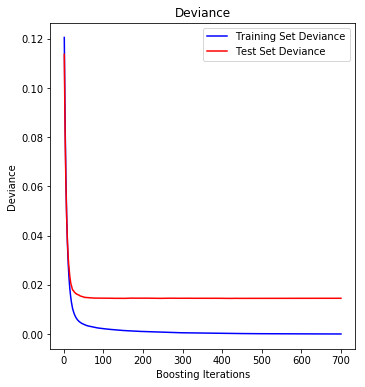

In [2253]:
# Plot training deviance

# compute test set deviance
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(clf.staged_predict(X_test)):
    test_score[i] = clf.loss_(y_test, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

In [2254]:
pipe = make_pipeline(clf)
pipe.fit(x,y)
predictions = pipe.predict(standard_test)

In [2255]:
submit = pd.DataFrame({'SalePrice':predictions})
submit["SalePrice"] = np.exp(submit["SalePrice"])-1
submit = pd.concat([test_df.Id,submit],axis=1)
type(submit.Id)
submit.to_csv("submission4-5.csv",index=False)

This scored a 0.143 so not the best. Below I want to try just select some of the most highly correlated variables and only use those in repeating some of the above regressions. 

In [2256]:

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

In [2257]:
gbr = GradientBoostingRegressor(max_depth=4, n_estimators=150)
gbr.fit(x, y)
np.sqrt(-cross_val_score(gbr, x, y, cv=5, scoring="neg_mean_squared_error")).mean()

0.11642345858495225

In [2258]:
pipe = make_pipeline(gbr)
pipe.fit(x,y)
predictions = pipe.predict(standard_test)

In [2259]:
submit = pd.DataFrame({'SalePrice':predictions})
submit["SalePrice"] = np.exp(submit["SalePrice"])-1
submit = pd.concat([test_df.Id,submit],axis=1)
type(submit.Id)
submit.to_csv("submission4-7.csv",index=False)

This scored a 0.17 so not very good

## Models with only the top 10 highest correlated variables
I need to first set up my model variables to prepare for modeling

In [2260]:
Select_Var

['TotalSqFt',
 'OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 'YearBuilt',
 'FullBath',
 'FullBathSq',
 '1stFlrSF',
 'Id',
 'YearRemodAdd',
 'GarageYrBlt',
 'TotRmsAbvGrd',
 'Fireplaces',
 'MasVnrArea',
 'LotArea',
 'LotFrontage',
 'OpenPorchSF',
 'BsmtFinSF1',
 'WoodDeckSF',
 '2ndFlrSF',
 'HalfBath',
 'BsmtFullBath',
 'BsmtUnfSF',
 'BedroomAbvGr']

In [2261]:
train_df = train_df[Select_Var]
test_df = test_df[Select_Var]
train_df.shape

(1378, 26)

In [2262]:
#combining the test and train datasets for creating dummy variables
whole_dataset = pd.concat([train_df,test_df],axis=0, sort=False)

In [2263]:
#there are no categorical variables here so I don't need to create dummies


In [2264]:
whole_dataset.shape

(2837, 26)

In [2265]:
#scale the dataset before breaking it up
from sklearn.preprocessing import MinMaxScaler, StandardScaler
min_max = MinMaxScaler()

whole_dataset = min_max.fit_transform(whole_dataset)
whole_dataset = pd.DataFrame(whole_dataset)
whole_dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,0.263522,0.666667,0.289015,0.4,0.368280,0.168008,0.949275,0.50,0.2500,0.109641,0.000000,0.883333,0.346154,0.461538,0.00,0.12250,0.129295,0.245810,0.082210,0.176060,0.000000,0.458647,0.5,0.333333,0.064212,0.500000
1,0.226872,0.555556,0.194917,0.4,0.309140,0.247694,0.753623,0.50,0.2500,0.194917,0.000343,0.433333,0.259615,0.307692,0.25,0.00000,0.150090,0.329609,0.000000,0.243890,0.209270,0.000000,0.0,0.000000,0.121575,0.500000
2,0.281022,0.666667,0.304978,0.4,0.408602,0.180569,0.934783,0.50,0.2500,0.123083,0.000685,0.866667,0.339744,0.307692,0.25,0.10125,0.179928,0.262570,0.056604,0.121197,0.000000,0.465091,0.5,0.333333,0.185788,0.500000
3,0.264029,0.666667,0.290485,0.6,0.431452,0.148381,0.311594,0.25,0.0625,0.131695,0.001028,0.333333,0.330128,0.384615,0.25,0.00000,0.149186,0.217877,0.047170,0.053865,0.000000,0.406015,0.0,0.333333,0.231164,0.500000
4,0.361994,0.777778,0.391514,0.6,0.561828,0.224730,0.927536,0.50,0.2500,0.170342,0.001371,0.833333,0.336538,0.538462,0.25,0.21875,0.234358,0.351955,0.113208,0.163342,0.134831,0.565521,0.5,0.333333,0.209760,0.666667


In [2377]:
#now to break them out into test and train datasets again
standard_train = whole_dataset.iloc[:1378, ]
standard_test = whole_dataset.iloc[1378:, ]
#to make sure it all looks good I'll just peek at the dataframes
standard_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301
1378,-0.092368,-0.226979,10.605659,-1.843488,-0.438197,-0.056413,0.056413,-0.209242,0.272423,-0.167029,-0.700015,-0.149474,-0.059475,0.740662,-0.198935,-0.200842,-0.126955,0.319649,0.018778,-0.018778,-0.460299,-0.246091,-0.173603,-0.070422,0.602189,0.208323,-0.201789,-0.049734,-0.09984,-0.059475,-0.103381,-0.197975,-0.105108,-0.321655,-0.190152,-0.267917,-0.240401,-0.183072,-0.114953,-0.198935,2.337181,-0.090407,-0.220025,-0.150701,-0.238756,-0.301221,-0.129792,-0.236272,-0.214689,-0.26182,-0.129792,-0.15313,-0.090407,-0.179964,4.103994,-2.490082,-0.079908,-0.114953,-0.09984,-0.131189,-0.046037,-0.056413,-0.042018,-0.067848,0.09984,-0.037576,-0.026561,-0.018778,-0.018778,-0.026561,0.456358,-0.144467,-0.198935,-0.187146,-0.294912,-0.347708,-0.082112,0.991226,-0.042018,-0.092368,-0.649109,-0.173603,-0.21737,-0.072907,0.501982,-0.088404,-0.473181,-0.062389,-0.037576,0.105108,-0.018778,-0.018778,-0.082112,-0.049734,-0.032536,-0.125514,-0.026561,-0.046037,-0.173603,-0.026561,-0.209242,-0.422665,-0.018778,-0.43017,-0.285633,-0.018778,-0.119587,1.353269,-0.402185,-0.140606,-0.116517,-0.037576,-0.088404,-0.126955,-0.032536,-0.210158,-0.402185,-0.070422,-0.428442,-0.018778,-0.316289,-0.042018,-0.124057,1.364831,-0.392671,-0.169245,-0.090407,-0.659547,0.805865,-0.299827,-0.179964,-0.108485,-0.710662,0.780506,-0.065175,-0.154331,-0.337431,-0.032536,0.387874,-0.346433,1.164608,-0.897695,-0.131189,-0.062389,-0.037576,-0.299827,-0.178918,-0.845103,-0.170344,1.124351,-0.193117,-0.206474,-0.171436,-0.042018,0.346433,-0.407493,-0.306756,-0.298428,0.715723,-0.171436,-0.418021,-0.319649,-0.633236,-0.236272,-0.16814,3.027946,-0.644724,-0.133942,-0.154331,-0.108485,5.690033,-0.16814,-0.192133,-2.422653,-0.018778,0.122584,-0.094289,-0.053178,-0.026561,-0.046037,-1.013843,-0.179964,-0.444468,-0.032536,1.543181,-0.270177,0.270177,-0.263354,-0.133942,-0.053178,-0.018778,0.306068,-0.26182,-0.155524,-0.808843,0.967056,-0.077643,-0.056413,-0.149474,-0.156709,-0.106809,-0.026561,0.267917,-0.114953,-0.162515,-0.574501,1.008140,-0.12838,-0.501432,-0.086356,0.835944,-0.111763,-0.254048,-0.072907,-0.610345,-0.23958,-0.562560,-0.24122,-0.621778,1.161254,-0.026561,-0.212886,-0.092368,-0.24122,-0.042018,0.35025,-0.032536,-0.163654,-0.072907,-0.24122,-0.070422,0.318979,-0.281278,-0.145734,0.322321,-0.026561,-0.026561,-0.032536,0.049734,-0.205544,-0.201789,2.770531,-0.065175,-2.005303,-0.042018,0.193117,-0.037576,-0.183072,-0.018778,-0.175746,-0.065175,-0.042018,-0.094289,-0.053178,-0.053178,-0.290655,-0.049734,0.387874,-0.264119,-0.065175,-0.090407,-0.126955,0.457485,-0.294205,-0.876679,0.583732,0.483977,-0.768009,0.389877,-0.338573,-1.106511,-0.570935,0.087071,0.566885,-0.660678,-0.372518,-0.667047,-0.785847,-0.095587,-1.233158,-0.813204,-0.248781,-1.024901,-0.750523,-1.050891,-0.208074,-0.925158,-0.911673,-0.688211,-0.993315,1.247008,0.386804,-0.699933,-0.362409,-0.103276,1.871297,-0

In [2378]:
#in preparation for some of my modeling I want to break up my standardized test data to be able to evaluate the performance of my tests
X_train,X_test,y_train,y_test = train_test_split(standard_train,y,test_size = 0.3,random_state= 42)
x = standard_train


### Starting to Model Round 2

In [2379]:
#lets try a linear regression with cross validation
linear_regression_model = SGDRegressor(tol=.01, eta0=.03)
linear_regression_model.fit(X_train, y_train)
train_predictions = linear_regression_model.predict(X_train)
test_predictions = linear_regression_model.predict(X_test)

train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

print("Train RMSE: {}".format(np.sqrt(train_mse)))
print("Test RMSE: {}".format(np.sqrt(test_mse)))

Train RMSE: 50287517003.85733
Test RMSE: 43100288616.891365


In [2380]:
pipe = make_pipeline(linear_regression_model)
pipe.fit(x,y)
predictions = pipe.predict(standard_test)
submit = pd.DataFrame({'SalePrice':predictions}
submit["SalePrice"] = np.exp(submit["SalePrice"])-1)
submit = pd.concat([test_df.Id,submit],axis=1)
type(submit.Id)
submit.to_csv("submission5.csv",index=False)

In [2381]:
# elastic net
clf = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], alphas=[0.01, .1, 1, 5, 9, 10])
clf.fit(X_train, y_train)
train_predictions = clf.predict(X_train)
test_predictions = clf.predict(X_test)
print("Train RMSE: {}".format(np.sqrt(mean_squared_error(y_train, train_predictions))))
print("Test RMSE: {}".format(np.sqrt(mean_squared_error(y_test, test_predictions))))

Train RMSE: 0.09443971627102518
Test RMSE: 0.1202861911244619


In [2382]:
pipe = make_pipeline(clf)
pipe.fit(x,y)
predictions = pipe.predict(standard_test)

In [2384]:
submit = pd.DataFrame({'SalePrice':predictions})
submit["SalePrice"] = np.exp(submit["SalePrice"])-1
submit = pd.concat([test_df.Id,submit],axis=1)
type(submit.Id)
submit.to_csv("submission6.csv",index=False)

In [2385]:
#Elastic Net random search, I will use the found parameters in my regression coming up
param_dist = { 'alpha' : [.1, 1, 5, 9], 'l1_ratio' : [0.5, 0.3, 0.85]}

linear_regression_model = ElasticNet()

n_iter_search = 8
random_search = RandomizedSearchCV(linear_regression_model, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=5, scoring='neg_mean_squared_error')
random_search.fit(X_train, y_train)

print("Best Parameters: {}".format(random_search.best_params_))
print("Best Negative MSE: {}".format(random_search.best_score_))

Best Parameters: {'l1_ratio': 0.3, 'alpha': 0.1}
Best Negative MSE: -0.01944847303794006


In [2386]:
#Bayesian Ridge Random Search, I will use the found parameters in my regression coming up
param_dist = { 'tol' : [.1, .01, .001, 0.0001, 0.00001], 'n_iter' : [300, 500, 600, 700, 800]}

linear_regression_model = BayesianRidge()

n_iter_search = 8
random_search = RandomizedSearchCV(linear_regression_model, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=5, scoring='neg_mean_squared_error')
random_search.fit(X_train, y_train)

print("Best Parameters: {}".format(random_search.best_params_))
print("Best Negative MSE: {}".format(random_search.best_score_))

Best Parameters: {'tol': 1e-05, 'n_iter': 600}
Best Negative MSE: -0.013397073449061499


In [2387]:
#Lasso Random Search, I will use the found parameters in my regression coming up
param_dist = { 'tol' : [.1, .01, .001, 0.0001], 'alpha' : [0.5, 1, 5, 9, 9.5]}

linear_regression_model = Lasso()

n_iter_search = 8
random_search = RandomizedSearchCV(linear_regression_model, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=5, scoring='neg_mean_squared_error')
random_search.fit(X_train, y_train)

print("Best Parameters: {}".format(random_search.best_params_))
print("Best Negative MSE: {}".format(random_search.best_score_))

Best Parameters: {'tol': 0.1, 'alpha': 9}
Best Negative MSE: -0.1428492779542883


Lasso : RMSE = 0.373678622588939


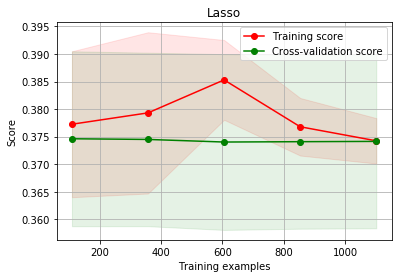

BayesianRidge : RMSE = 0.11506558585984594


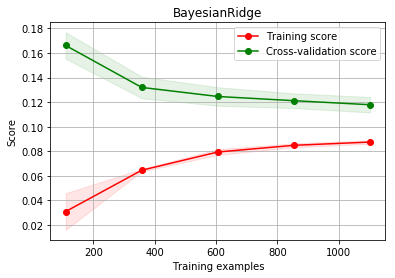

In [2388]:
lr = Lasso(alpha = 9.5, tol = 0.0001, max_iter=1500)
br = BayesianRidge(n_iter=500, tol=0.1)
modeltypes = [lr, br]
for model in modeltypes:
    scores = return_rmse(model, x, y)
    print(model.__class__.__name__,": RMSE =", scores)
    plot_learning_curve(model, model.__class__.__name__, x, y, cv = 5)
    plt.show()

In [2389]:
pipe = make_pipeline(br)
pipe.fit(x,y)
predictions = pipe.predict(standard_test)

In [2390]:
submit = pd.DataFrame({'SalePrice':predictions})
submit["SalePrice"] = np.exp(submit["SalePrice"])-1
submit = pd.concat([test_df.Id,submit],axis=1)
type(submit.Id)
submit.to_csv("submission7.csv",index=False)

This bayesian ridge model scores a 0.13192 on Kaggle

The Elastic Net CV is my best at 0.124 and what I will keep as my high score. It is interesting that this one did the best because it must have found the harmony between ridge and lasso to the point of reduce the high variance (overfitting) without decreasing the bias too much, as theorized in that section. 

It was interesting though because I only dropped outliers after I first ran my models. Before I dropped my outliers my high score on Kaggle was a 0.1705 but with dropping outliers I improved by about 0.03 which is great! I then proceeded to do feature engineering which dropped my kaggle score to about 0.131 with a basic linear regression. I then proceeded to take the log of sales price to unskew the data which dropped my best score to a 0.124 with elastic net. 

I think my final model was useful. Obviously there is room for work to be done but with some fine tuning this model could be great resources. This model is more suited for middle class homes because the dataset had an average house price of $180,000. This model would not work so well in very affluent areas so has limited usefulness. It seems that people care about the overall quality and condition of the house a lot along with the square footage and age of the house. An interesting feature of note is the presence and size of the garage. This may not be a causal mechanism because presence of and size of a garage is often correlated with simply larger houses which inherintly go for higher prices. I was able to overcome the high variance issues present in my linear regression by switching to regularization models to penalize based on the number of coefficients used and this produced results with lower variance. There is still some presence of high bias that can come from better handling the missing values that were in the dataset earlier on. I was also able to overcome high variance by reducing the variables in my dataset which is what I did above. This did reduce the variance but also caused higher bias within my sample. 

I would not recommedn this model at this stage to be used, it needs more data for training, especially for different characteristics. 